In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Linear fit
# fit a0 + a1*x = y, with analytical method
def linear_fit_analytical(xs, ys, sigmas, draw=False, print_solution_vector=False, print_covariance_matrix=False, xlabel='x', ylabel='y(x)'):
    cm = 1.06
    x=xs
    y=ys
    sig = sigmas
    w = 1/sig**2
    # normalmatrix 2x2
    N = np.zeros((2,2))
    N[0,0] = np.sum(w)
    N[0,1] = np.sum(w * x)
    N[1,0] = np.sum(w * x)
    N[1,1] = np.sum(w * x**2)
    # solution vector
    Y = np.zeros((2,1))
    Y[0] = np.sum(w * y)
    Y[1] = np.sum(w * x * y)
    # mit der Lösung
    a = np.linalg.inv(N)@Y
    # A@B is a shorthand for np.dot(A,B) and retuns the matrix product, while A*B attempts elementwise multiplication
    if (print_solution_vector):
        print("solution vector:")
        print(a)
    # und der Covarianz-Matrix
    C = np.linalg.inv(N)
    if (print_covariance_matrix):
        print("Covarianz Matrix:")
        print(C)
    a0_error = np.sqrt(C[0,0])
    a1_error = np.sqrt(C[1,1])
    if (draw):
        fig, ax = plt.subplots(1,1,figsize=(6*cm, 7*cm))
        ax.errorbar(x, y, yerr=sig, marker='s', linestyle='', capsize=3, label=ylabel)
        ax.plot(x, a[0,0] + a[1,0]*x, label='fit')
        ax.set_title('%s = a%s + b \n $a=%.4f \pm %.4f$ \n $b=%.4f \pm %.4f$' % (ylabel, xlabel, a[1], a1_error, a[0], a0_error))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(loc='upper left')
        fig.tight_layout(pad=0.1)
        plt.savefig('w-A.png')
        plt.show()
    print('b = ', '%.5f' % a[0])
    print('a = ', '%.5f' % a[1])
    print('b_error = ', '%.5f' % a0_error)
    print('a_error = ', '%.5f' % a1_error)

    return a[0], a[1], a0_error, a1_error

b =  0.00001
a =  0.00590
b_error =  0.00100
a_error =  0.00033
b =  -0.00000
a =  0.00741
b_error =  0.00100
a_error =  0.00062
b =  -0.00000
a =  0.00532
b_error =  0.00100
a_error =  0.00038
H (fit 1) = 4.192e+05 += 8.566e+04
H (fit 2) = 5.262e+05 += 1.065e+05
H (fit 3) = 3.781e+05 += 8.976e+04
mht 4.412e+05 += 1.635e+05


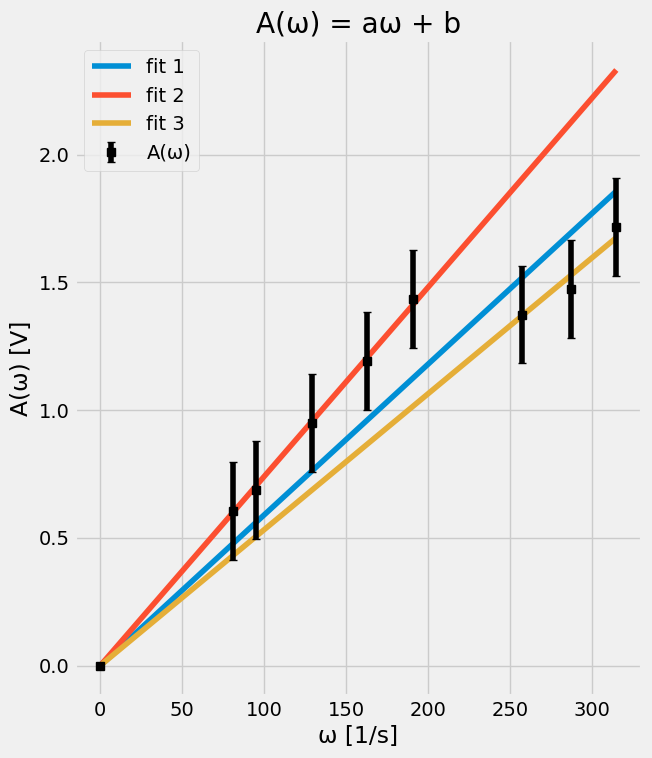

In [14]:
# THIS IS A SELF MADE METHOD TO DETERMINE MEASUREMENT ERRORS. FIRST WE FIGURED OUT THAT A/f = CONST so we divided all A's by the f's and 
# calculated the standard deviation of that. Setting an array with N times this value and dividing by each frequency gives us a rough approximation of how much
# each value deviates from an ideal linear model.

# Import data (arrays of w and A values)
filename_FA = os.path.join(os.getcwd(), "Freq_A.csv")
freq_f, A = np.genfromtxt(filename_FA, delimiter=',', skip_header=1, unpack=True)
freq_w = 2*np.pi*freq_f

# Calculating amplitude errors
# A/w = CONST in a linear model, taking the standard deviation of that
# and multiplying by the mean frequency gives us an error value
err = np.std(np.divide(A, freq_w))*np.mean(freq_w)

# Appending (w=0, A=0, err=0.001) to improve our result,
# because we know that should be a solution
ws = np.append([0], freq_w)
As = np.append([0], A)
ws_left, ws_right = ws[0:-3], np.append(ws[0], ws[-3:]) # For fitting only the left points
As_left, As_right = As[0:-3], np.append(ws[0], As[-3:]) # For fitting only the right points

sig = np.ones(len(A))*err
sigmas = np.append([0.001], sig)
sigmas_left, sigmas_right = sigmas[0:-3], np.append(sigmas[0], sigmas[-3:])

# Fitting
b, a, b_err, a_err = linear_fit_analytical(ws, As, sigmas) # a0 + a1x
b_left, a_left, b_left_err, a_left_err = linear_fit_analytical(ws_left, As_left, sigmas_left)
b_right, a_right, b_right_err, a_right_err = linear_fit_analytical(ws_right, As_right, sigmas_right)

n = 100
S = 1.12 / (100*100)
mu_0 = 1.25663706212*np.power(10.,-6)
H = a / (mu_0*n*S)
H_left = a_left / (mu_0*n*S)
H_right = a_right / (mu_0*n*S)

# Assuming no errors in given n, S, mu0, calculate error of H:
H_123 = np.array([H, H_left, H_right])
a_values = np.array([a, a_left, a_right])
H_error = np.sqrt((a_err+np.std(a_values))**2 * (1/(mu_0*n*S)**2))
H_left_error = np.sqrt((a_left_err+np.std(a_values))**2 * (1/(mu_0*n*S)**2))
H_right_error = np.sqrt((a_right_err+np.std(a_values))**2 * (1/(mu_0*n*S)**2))

print("H (fit 1) = %.3e += %.3e" % (H, H_error))# Unit = Ampere / meter
print("H (fit 2) = %.3e += %.3e" % (H_left, H_left_error))
print("H (fit 3) = %.3e += %.3e" % (H_right, H_right_error))

H_123_errs = np.array([H_error, H_left_error, H_right_error])
meanhtest = np.mean(H_123)
meanhtest_err = np.sqrt(np.sum(np.square(H_123_errs)))
print("mht %.3e += %.3e" % (meanhtest, meanhtest_err))

# Draw The fits into a single diagram
plt.style.use('fivethirtyeight')
ylabel, yunit='A(ω)', 'V'
xlabel, xunit ='ω', '1/s'
cm = 1.06
fig, ax = plt.subplots(1,1,figsize=(6*cm, 7*cm))
# Plot the fit of all
ax.plot(ws, b + a*ws, label='fit 1')
ax.plot(ws, b_left + a_left*ws, label='fit 2')
ax.plot(ws, b_right + a_right*ws, label='fit 3')
ax.errorbar(ws, As, yerr=sigmas, marker='s', linestyle='', capsize=3, label=ylabel, color='black')
ax.set_title('%s = a%s + b' % (ylabel, xlabel))
ax.set_xlabel('%s [%s]' % (xlabel, xunit))
ax.set_ylabel('%s [%s]' % (ylabel, yunit))
ax.legend(loc='upper left')
fig.tight_layout(pad=0.1)
plt.savefig('w-A.png')
plt.show()